In [ ]:
##Comparison between models##
#@author: angeladominguezgil

#Performance metrics and graphics comparing LDA, DT and RF
#In this case, I added a previous FSW model to compare with the rest.

In [1]:
#Import libraries and functions needed
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score 
from sklearn.utils.class_weight import compute_class_weight
from matplotlib.lines import Line2D

In [2]:
#Current directory
os.getcwd()
#Change working directory
os.chdir('C:\\Users\\Administrador\\Desktop\\python')
os.listdir()

['.ipynb_checkpoints',
 'data.csv',
 'graficos',
 'Graphics.ipynb',
 'Model_6800 pairs of DNA.ipynb',
 'model_DecisionTreeClassifier.ipynb',
 'model_hypercholesterolemia-checkpoint.ipynb',
 'model_LDA.ipynb',
 'model_RandomForest.ipynb']

In [3]:
#Loading data: 
pd.read_csv("data.csv", sep=";")
data = pd.read_csv("data.csv",sep=";")
data.head(10) #muestra las primeras 10 filas de la tabla

,n,f(vij/c0)obj,Subset,f(c0)ref,D3(Set1),V2(Set1),D3(Set2),V1(Set2),D3(Set3),D1(Set4)
0,1,0,t,0.325301,2.515821,0.24,3.37,0.1,3.03,58.64
1,2,0,t,0.325301,2.475821,0.24,3.33,0.1,2.99,120.59
2,3,0,t,0.325301,2.475821,-1.01,3.33,0.1,2.99,115.82
3,4,0,v,0.325301,1.735821,0.24,2.59,0.1,2.25,7.90
4,5,0,t,0.325301,0.955821,0.24,1.81,0.1,1.47,2.53
5,6,0,t,0.325301,0.805821,0.24,1.66,0.1,1.32,-20.15
6,7,0,t,0.325301,0.175821,0.24,1.03,0.1,0.69,-25.52
7,8,0,v,0.325301,-0.194179,-1.01,0.66,0.1,0.32,24.49
8,9,0,t,0.325301,-0.194179,0.24,0.66,0.1,0.32,24.49
9,10,0,t,0.325301,-0.604179,0.24,0.25,0.1,-0.09,-53.58


In [4]:
#Data Splitting:
Y= data.iloc[:,1]
X = data.iloc[:, 3:]
print(Y) 
print(X)

0         0
1         0
2         0
3         0
4         0
         ..
369253    0
369254    0
369255    0
369256    0
369257    0
Name: f(vij/c0)obj, Length: 369258, dtype: int64
        f(c0)ref  D3(Set1)  V2(Set1)  D3(Set2)  V1(Set2)  D3(Set3)  D1(Set4)
0       0.325301  2.515821      0.24      3.37       0.1      3.03     58.64
1       0.325301  2.475821      0.24      3.33       0.1      2.99    120.59
2       0.325301  2.475821     -1.01      3.33       0.1      2.99    115.82
3       0.325301  1.735821      0.24      2.59       0.1      2.25      7.90
4       0.325301  0.955821      0.24      1.81       0.1      1.47      2.53
...          ...       ...       ...       ...       ...       ...       ...
369253  0.000000 -1.889286     -0.07     -1.50       0.1     -1.42    -17.50
369254  0.000000 -1.889286     -0.07     -1.50       0.1     -1.42    -17.50
369255  0.000000 -2.209286     -0.07     -1.82       0.1     -1.74    -61.52
369256  0.000000 -2.209286     -0.07     -1.82   

In [5]:
#Splitting Data into Training and Prediction Sets:
train_data = data[data["Subset"] == "t"]
pred_data = data[data["Subset"] == "v"]

In [6]:
##LDA##

#Model Preparation for LDA:
X_train_lda= train_data.iloc[:, 3:]
X_test_lda = pred_data.iloc[:, 3:]
y_train_lda= train_data.iloc[:, 1]
y_test_lda= pred_data.iloc[:, 1]

print(X_test_lda.shape)
print(X_train_lda.shape)
print(y_test_lda.shape)
print(y_train_lda.shape)

#X_LDA
mlr_X_train_lda= X_train_lda[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]
mlr_X_test_lda = X_test_lda[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]

(92314, 7)
(276944, 7)
(92314,)
(276944,)


In [7]:
#Define the LDA model and prior probability
priors = [0.5,0.5]
lda_model = LinearDiscriminantAnalysis(priors=priors)

#Fit the model to initialize atributes
lda_model.fit(mlr_X_train_lda, y_train_lda)

LinearDiscriminantAnalysis(priors=[0.5, 0.5])

In [8]:
#Define the hyperparameter search space

param_grid = {
    'solver': ['lsqr'],
    'shrinkage': [None], 
    'priors' : [[0.5,0.5]]
}

In [9]:
#Perform hyperparameter search (GridSearch) by cross-validation
grid_search_lda= GridSearchCV(estimator=lda_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit model lda
grid_search_lda.fit(mlr_X_train_lda, y_train_lda)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(priors=[0.5, 0.5]),
             param_grid={'priors': [[0.5, 0.5]], 'shrinkage': [None],
                         'solver': ['lsqr']},
             scoring='accuracy')

In [10]:
#make predictions on the train set
y_pred_train_lda = lda_model.predict(mlr_X_train_lda)
#calculate confusion matrix
cm_train_lda= confusion_matrix(y_train_lda, y_pred_train_lda)
print(cm_train_lda)
#calculate performance metrics
tn_train_lda, fp_train_lda, fn_train_lda, tp_train_lda = cm_train_lda.ravel()
specificity_train_lda = tn_train_lda / (tn_train_lda + fp_train_lda)
sensitivity_train_lda = tp_train_lda / (tp_train_lda + fn_train_lda)
accuracy_train_lda = (tp_train_lda + tn_train_lda) / (tp_train_lda + tn_train_lda + fp_train_lda + fn_train_lda)
false_positive_train_lda = fp_train_lda / (fp_train_lda + tn_train_lda)
print(specificity_train_lda, sensitivity_train_lda, accuracy_train_lda)
mcc_train_lda=matthews_corrcoef(y_train_lda, y_pred_train_lda)
print(mcc_train_lda)

[[ 67194  25664]
 [ 46410 137676]]
0.7236210127291133 0.7478895733515857 0.7397524409266856
0.4525519116554553


In [11]:
# make predictions on the test set
y_pred_test_lda = lda_model.predict(mlr_X_test_lda)
#calculate confusion matrix
cm_test_lda= confusion_matrix(y_test_lda, y_pred_test_lda)
print(cm_test_lda)
# calculate performance metrics
tn_test_lda, fp_test_lda, fn_test_lda, tp_test_lda = cm_test_lda.ravel()
specificity_test_lda = tn_test_lda / (tn_test_lda + fp_test_lda)
sensitivity_test_lda = tp_test_lda / (tp_test_lda + fn_test_lda)
accuracy_test_lda = (tp_test_lda + tn_test_lda) / (tp_test_lda + tn_test_lda + fp_test_lda + fn_test_lda)
false_positive_test_lda = fp_test_lda / (fp_test_lda + tn_test_lda)
print(specificity_test_lda, sensitivity_test_lda, accuracy_test_lda)
mcc_test_lda=matthews_corrcoef(y_test_lda, y_pred_test_lda)
print(mcc_test_lda)

[[22388  8555]
 [15479 45892]]
0.7235238987816307 0.7477798960421046 0.7396494572870854
0.4523205484133295


In [12]:
##DECISION TREE CLASSIFIER##

# Model Preparation for Decision Tree
X_train_tree= train_data.iloc[:, 3:]
X_test_tree= pred_data.iloc[:, 3:]
y_train_tree= train_data.iloc[:, 1]
y_test_tree= pred_data.iloc[:, 1]

print(X_test_tree.shape)
print(X_train_tree.shape)
print(y_test_tree.shape)
print(y_train_tree.shape)

#X_tree
mlr_X_train_tree= X_train_tree[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]
mlr_X_test_tree = X_test_tree[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]

(92314, 7)
(276944, 7)
(92314,)
(276944,)


In [13]:
# Define class weights to change the prior probability
seed = 40

# Define the decision tree model
tree_model= DecisionTreeClassifier(random_state=seed,class_weight='balanced') 

In [14]:
#Define the hyperparameter search space
param_grid = {
    'criterion': ['gini'],
    'max_depth': [4],
    'min_samples_split': [int(0.01*len(X_train_tree))],
    'min_samples_leaf': [int(0.005*len(X_train_tree))]
}

# Perform hyperparameter search by cross-validation
grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(mlr_X_train_tree, y_train_tree)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=40),
             param_grid={'criterion': ['gini'], 'max_depth': [4],
                         'min_samples_leaf': [1384],
                         'min_samples_split': [2769]},
             scoring='accuracy')

In [15]:
# make predictions on the train set
y_pred_train_tree = grid_search_tree.predict(mlr_X_train_tree)
# calculate confusion matrix
cm_train_tree = confusion_matrix(y_train_tree, y_pred_train_tree)
print('Confusion matrix:','\n', cm_train_tree)
# calculate performance metrics
tn_train_tree, fp_train_tree, fn_train_tree, tp_train_tree = cm_train_tree.ravel()
specificity_train_tree = tn_train_tree / (tn_train_tree + fp_train_tree)
sensitivity_train_tree = tp_train_tree / (tp_train_tree + fn_train_tree)
accuracy_train_tree = (tp_train_tree + tn_train_tree) / (tp_train_tree + tn_train_tree + fp_train_tree + fn_train_tree)
false_positive_train_tree = fp_train_tree / (fp_train_tree + tn_train_tree)
print('Specificity:',specificity_train_tree,'\n', 'Sensitivity:', sensitivity_train_tree,'\n','Accuracy:', accuracy_train_tree)
mcc_train_tree = matthews_corrcoef(y_train_tree, y_pred_train_tree)
print(mcc_train_tree)

Confusion matrix: 
 [[ 67624  25234]
 [ 46862 137224]]
Specificity: 0.728251739214715 
 Sensitivity: 0.7454341992329672 
 Accuracy: 0.7396730024842567
0.45411285267206464


In [24]:
# make predictions on the test set
y_pred_test_tree = grid_search_tree.predict(mlr_X_test_tree)
#calculate confusion matrix
cm_test_tree = confusion_matrix(y_test_tree, y_pred_test_tree)
print('Confusion matrix:', '\n', cm_test_tree)
# calculate performance metrics on test set
tn_test_tree, fp_test_tree, fn_test_tree, tp_test_tree = cm_pred_test_tree.ravel()
specificity_test_tree = tn_test_tree / (tn_test_tree + fp_test_tree)
sensitivity_test_tree = tp_test_tree / (tp_test_tree + fn_test_tree)
accuracy_test_tree = (tp_test_tree + tn_test_tree) / (tp_test_tree + tn_test_tree + fp_test_tree + fn_test_tree)
false_positive_test_tree = fp_test_tree / (fp_test_tree + tn_test_tree)
print('Specificity;', specificity_test_tree,'\n','Sensitivity:', sensitivity_test_tree,'\n', 'Acurracy:', accuracy_test_tree)
mcc_test_tree=matthews_corrcoef(y_test_tree, y_pred_test_tree)
print(mcc_test_tree)

Confusion matrix: 
 [[22532  8411]
 [15636 45735]]
Specificity; 0.7281776169085092 
 Sensitivity: 0.7452216845089701 
 Acurracy: 0.7395086335767056
0.4537927259292524


In [17]:
##RANDOM FOREST##
#Model Preparation for Random Forest:
X_train_forest= train_data.iloc[:, 3:]
X_test_forest = pred_data.iloc[:, 3:]
y_train_forest= train_data.iloc[:, 1]
y_test_forest= pred_data.iloc[:, 1]

print(X_test_forest.shape)
print(X_train_forest.shape)
print(y_test_forest.shape)
print(y_train_forest.shape)

#X_forest
mlr_X_train_forest= X_train_forest[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]
mlr_X_test_forest = X_test_forest[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]

(92314, 7)
(276944, 7)
(92314,)
(276944,)


In [18]:
#Define prior probabilities and adjust as needed
class_weight = {0:0.5,1:0.5}
# Define the random forest model
seed = 44
rf_model = RandomForestClassifier(random_state=seed, class_weight='balanced', bootstrap=True) 

In [19]:
#Define the hyperparameter search space
param_grid = {
    'n_estimators': [50],
    'max_depth': [None],
    'min_samples_split': [2769],
    'min_samples_leaf': [1384]
}

# Perform hyperparameter search by cross-validation
grid_search_forest = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit model
grid_search_forest.fit(mlr_X_train_forest, y_train_forest)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=44),
             n_jobs=-1,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1384],
                         'min_samples_split': [2769], 'n_estimators': [50]},
             scoring='accuracy')

In [20]:
#make predictions on the train set
y_pred_train_forest = grid_search_forest.predict(mlr_X_train_forest)

#calculate confusion matrix
cm_train_forest = confusion_matrix(y_train_forest, y_pred_train_forest)
print(cm_train_forest)

#calculate performance metrics
tn_train_forest, fp_train_forest, fn_train_forest, tp_train_forest = cm_train_forest.ravel()

specificity_train_forest = tn_train_forest / (tn_train_forest + fp_train_forest)
sensitivity_train_forest = tp_train_forest / (tp_train_forest + fn_train_forest)
accuracy_train_forest = (tp_train_forest + tn_train_forest) / (tp_train_forest + tn_train_forest + fp_train_forest + fn_train_forest)
false_positive_train_forest = fp_train_forest / (fp_train_forest + tn_train_forest)
print('Specificity:',specificity_train_forest,'\n', 'Sensitivity:', sensitivity_train_forest,'\n','Accuracy:', accuracy_train_forest)
mcc_train_forest = matthews_corrcoef(y_train_forest, y_pred_train_forest)

[[ 67409  25449]
 [ 46498 137588]]
Specificity: 0.7259363759719141 
 Sensitivity: 0.7474115359125626 
 Accuracy: 0.7402110173897972


In [21]:
#make predictions on the test set
y_pred_test_forest = grid_search_forest.predict(mlr_X_test_forest)

#calculate confusion matrix
cm_test_forest = confusion_matrix(y_test_forest, y_pred_test_forest)
print(cm_train_forest)

#calculate performance metrics
tn_test_forest, fp_test_forest, fn_test_forest, tp_test_forest = cm_test_forest.ravel()

specificity_test_forest = tn_test_forest / (tn_test_forest + fp_test_forest)
sensitivity_test_forest = tp_test_forest / (tp_test_forest + fn_test_forest)
accuracy_test_forest = (tp_test_forest + tn_test_forest) / (tp_test_forest + tn_test_forest + fp_test_forest + fn_test_forest)
false_positive_test_forest = fp_test_forest / (fp_test_forest + tn_test_forest)
print('Specificity:',specificity_test_forest,'\n', 'Sensitivity:', sensitivity_test_forest,'\n','Accuracy:', accuracy_test_forest)
mcc_test_forest = matthews_corrcoef(y_test_forest, y_pred_test_forest)

[[ 67409  25449]
 [ 46498 137588]]
Specificity: 0.7258830753320622 
 Sensitivity: 0.747323654494794 
 Accuracy: 0.7401369239768616


In [22]:
# create a bar plot of the performance metrics for each classifier for the training and test sets
fsw_train_values=[0.740, 0.724, 0.748, 0]
lda_train_values = [accuracy_train_lda, specificity_train_lda, sensitivity_train_lda, mcc_train_lda]
tree_train_values = [accuracy_train_tree,specificity_train_tree,sensitivity_train_tree,mcc_train_tree]
forest_train_values = [accuracy_train_forest, specificity_train_forest, sensitivity_train_forest, mcc_train_forest]

fsw_test_values=[0.740, 0.724, 0.748,0]
lda_test_values = [accuracy_test_lda, specificity_test_lda, sensitivity_test_lda, mcc_test_lda]
tree_test_values = [accuracy_test_tree,specificity_test_tree,sensitivity_test_tree,mcc_test_tree]
forest_test_values = [accuracy_test_forest, specificity_test_forest, sensitivity_test_forest, mcc_test_forest]


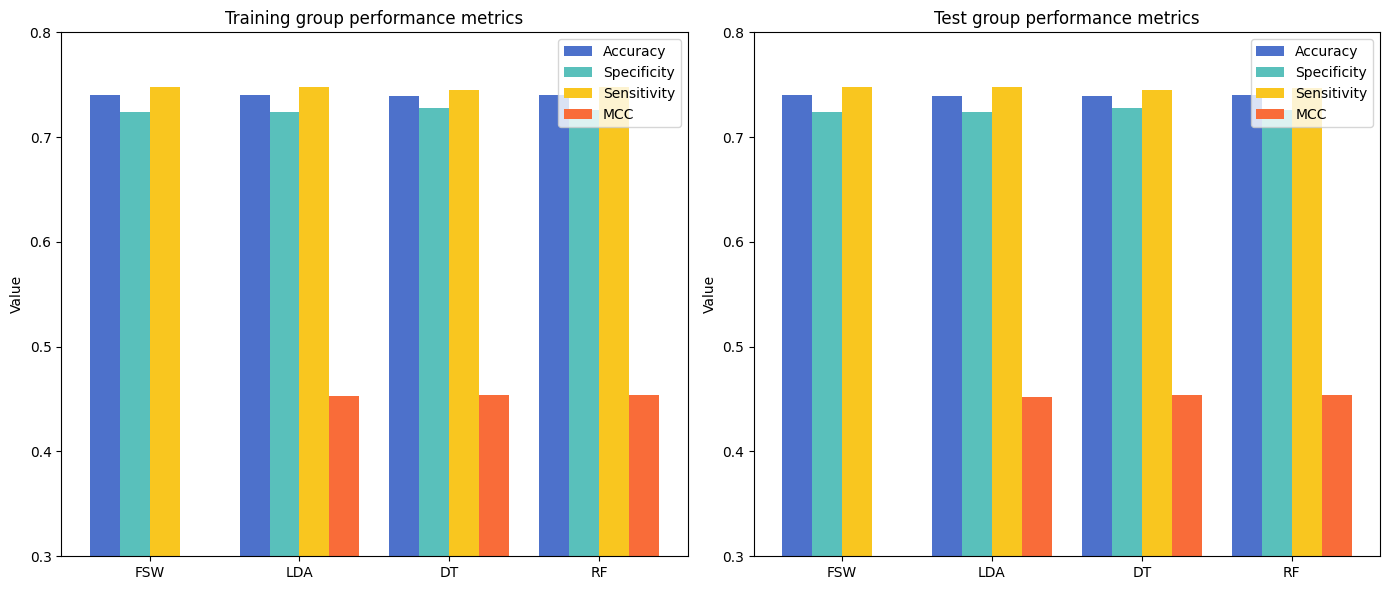

In [23]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Accuracy', 'Specificity', 'Sensitivity','MCC']
metrics=['FSW', 'LDA', 'DT','RF']
train_values = [fsw_train_values, lda_train_values, tree_train_values, forest_train_values]
test_values = [fsw_test_values, lda_test_values, tree_test_values, forest_test_values]

x = np.arange(len(labels))  # Posición de los modelos
width = 0.2  # Ancho de las barras

colors = ['#4d71cb', '#59c0bb', '#f9c61f','#f96c39']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de entrenamiento
for i, metric in enumerate(labels):
    ax1.bar(x + i*width - width*1.5, [train_values[j][i] for j in range(len(labels))], width, label=metric, color=colors[i])


ax1.set_ylabel('Value')
ax1.set_title('Training group performance metrics')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend()
ax1.set_ylim(0.3, 0.8)

# Gráfico de validación
for i, metric in enumerate(labels):
    ax2.bar(x + i*width - width*1.5, [test_values[j][i] for j in range(len(labels))], width, label=metric, color=colors[i])


ax2.set_ylabel('Value')
ax2.set_title('Test group performance metrics')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.set_ylim(0.3,0.8)

plt.tight_layout()
plt.show()


In [27]:
print(cm_train_lda,'\n','\n', cm_test_lda,'\n','\n', cm_train_tree,'\n','\n', cm_test_tree,'\n','\n', cm_train_forest,'\n','\n', cm_test_forest)

[[ 67194  25664]
 [ 46410 137676]] 
 
 [[22388  8555]
 [15479 45892]] 
 
 [[ 67624  25234]
 [ 46862 137224]] 
 
 [[22532  8411]
 [15636 45735]] 
 
 [[ 67409  25449]
 [ 46498 137588]] 
 
 [[22461  8482]
 [15507 45864]]
